<a href="https://colab.research.google.com/github/Kundan71/EDA-on-IMDB-/blob/main/EDA_on_IMDB_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## You have been hired by a rookie movie producer to help him decide what type of movies to produce and which actors to cast. You have to back your recommendations based on thorough analysis of the data he shared with you which has the list of 3000 movies and the corresponding details.

## As a data scientist, you have to first explore the data and check its sanity.

## Further, you have to answer the following questions:
1. ### <b> Which movie made the highest profit? Who were its producer and director? Identify the actors in that film.</b>
2. ### <b>This data has information about movies made in different languages. Which language has the highest average ROI (return on investment)? </b>
3. ### <b> Find out the unique genres of movies in this dataset.</b>
4. ### <b> Make a table of all the producers and directors of each movie. Find the top 3 producers who have produced movies with the highest average RoI? </b>
5. ### <b> Which actor has acted in the most number of movies? Deep dive into the movies, genres and profits corresponding to this actor. </b>
6. ### <b>Top 3 directors prefer which actors the most? </b>



# Data Exploration

In [ ]:
#Import package
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Module 1/Projects/data/Copy of imdb_data.csv'
imdb_df=pd.read_csv(file_path)

In [ ]:
imdb_df.shape

(3000, 23)

In [ ]:
imdb_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [ ]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [ ]:
type(imdb_df.loc[0,'crew']) 

str

In [ ]:
imdb_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [ ]:
column_to_keep = ['imdb_id', 'budget', 'genres', 'original_language', 'title', 'cast', 'crew', 'revenue']

In [ ]:
imdb_df = imdb_df[column_to_keep]

In [ ]:
# crew,cast,& genres are str data, we will use eval() fn to convert it into real list
def convert_string_to_list(string):
  return eval(string)

In [ ]:
imdb_df.loc[~imdb_df['genres'].isna(),'genres'] = imdb_df.loc[~imdb_df['genres'].isna(),'genres'].apply(convert_string_to_list)
imdb_df.loc[~imdb_df['crew'].isna(),'crew'] = imdb_df.loc[~imdb_df['crew'].isna(),'crew'].apply(convert_string_to_list)
imdb_df.loc[~imdb_df['cast'].isna(),'cast'] = imdb_df.loc[~imdb_df['cast'].isna(),'cast'].apply(convert_string_to_list)

In [ ]:
imdb_df.loc[0,'genres']

[{'id': 35, 'name': 'Comedy'}]

In [ ]:
imdb_df_new = imdb_df.copy()

# **Which movie made the highest profit? Who were its producer and director? Identify the actors in that film.**

In [ ]:
imdb_df_new.describe()

,budget,revenue
count,3.000000e+03,3.000000e+03
mean,2.253133e+07,6.672585e+07
std,3.702609e+07,1.375323e+08
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,2.379808e+06
50%,8.000000e+06,1.680707e+07
75%,2.900000e+07,6.891920e+07
max,3.800000e+08,1.519558e+09


In [ ]:
# we know that budget and revenue can't be 0 so, we need to remove outliers
imdb_df_new.loc[imdb_df_new['budget']<=1000,'budget'] = imdb_df_new.loc[imdb_df_new['budget']>=1000,'budget'].median()
imdb_df_new.loc[imdb_df_new['revenue']<=1000,'revenue'] = imdb_df_new.loc[imdb_df_new['revenue']>=1000,'revenue'].median()

In [ ]:
imdb_df_new.describe()

,budget,revenue
count,3.000000e+03,3.000000e+03
mean,2.708250e+07,6.705811e+07
std,3.492773e+07,1.373917e+08
min,2.500000e+03,1.404000e+03
25%,1.000000e+07,2.947600e+06
50%,1.645000e+07,1.748753e+07
75%,2.900000e+07,6.891920e+07
max,3.800000e+08,1.519558e+09


In [ ]:
imdb_df_new['profit'] = imdb_df_new['revenue'] - imdb_df_new['budget']

In [ ]:
imdb_df_new.head()

,imdb_id,budget,genres,original_language,title,cast,crew,revenue,profit
0,tt2637294,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,-1685349
1,tt0368933,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,55149435
2,tt2582802,3300000,"[{'id': 18, 'name': 'Drama'}]",en,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,9792000
3,tt1821480,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,14800000
4,tt1380152,16450000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,-12526030


In [ ]:
max_profit = imdb_df_new['profit'].max()

In [ ]:
max_profit_movies = imdb_df_new[imdb_df_new['profit'] == max_profit]

In [ ]:
max_profit_movies

,imdb_id,budget,genres,original_language,title,cast,crew,revenue,profit
1761,tt2820852,190000000,"[{'id': 28, 'name': 'Action'}]",en,Furious 7,"[{'cast_id': 17, 'character': 'Dominic Toretto...","[{'credit_id': '52fe4cc8c3a36847f823e681', 'de...",1506249360,1316249360


In [ ]:
max_profit_movies.iloc[0]['crew']

In [ ]:
max_profit_movies_df = max_profit_movies['crew'].values
crew_list = max_profit_movies.iloc[0]['crew']

In [ ]:
producer_list = []
director_list = []
for elem in crew_list:
  if elem['job'] == 'Producer':
    producer_list.append(elem['name'])
    
  if elem['job'] == 'Director':
    director_list.append(elem['name'])

In [ ]:
director_list

['James Wan']

In [ ]:
max_profit_movies.iloc[0]['cast']

In [ ]:
actor_list_df = max_profit_movies.iloc[0]['cast']

In [ ]:
actor_list = []
#male_actor_list = []
for elem in actor_list_df:
  actor_list.append(elem['name'])
    
  #if elem['gender'] == 2:
    #male_actor_list.append(elem['name'])

In [ ]:
actor_list

# **This data has information about movies made in different languages. Which language has the highest average ROI (return on investment)?** ROI = (Profit/budget)*100

In [ ]:
imdb_df_new['roi'] = imdb_df_new['profit']/imdb_df_new['budget']*100

In [ ]:
imdb_df_new.head()

,imdb_id,budget,genres,original_language,title,cast,crew,revenue,profit,roi
0,tt2637294,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,-1685349,-12.038207
1,tt0368933,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,55149435,137.873588
2,tt2582802,3300000,"[{'id': 18, 'name': 'Drama'}]",en,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,9792000,296.727273
3,tt1821480,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,14800000,1233.333333
4,tt1380152,16450000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,-12526030,-76.146079


In [ ]:
roi_la_df = imdb_df_new.groupby('original_language')['roi'].mean().reset_index()

In [ ]:
max_roi_lan = roi_la_df[roi_la_df['roi'] == roi_la_df['roi'].max()]['original_language']

In [ ]:
max_roi_lan

18    ko
Name: original_language, dtype: object

# **Find out the unique genres of movies in this dataset.**

In [ ]:
imdb_no_null_genres_df = imdb_df_new[~imdb_df_new['genres'].isna()]

In [ ]:
imdb_no_null_genres_df.shape

(2993, 10)

In [ ]:
genres_list = []
for index,movie in imdb_no_null_genres_df.iterrows():
  for elem in movie['genres']:
    genres_list.append(elem['name'])


In [ ]:
set(genres_list)

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

# **Make a table of all the producers and directors of each movie. Find the top 3 producers who have produced movies with the highest average RoI?**

# **Hint**
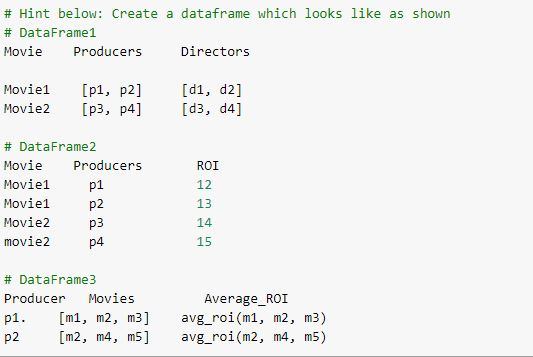

In [ ]:
imdb_no_null_crew_df = imdb_df_new[~imdb_df_new['crew'].isna()]

In [ ]:
imdb_no_null_crew_df.shape

(2984, 10)

In [ ]:
#create fn to get producer and director list from each rows of data
def get_producer_and_director(crew):
  try:
    producers_list = []
    directors_list = []
    for elem in crew:
      if elem['job'] == 'Producer':
        producers_list.append(elem["name"])
      if elem['job'] == 'Director':
        directors_list.append(elem['name'])
    return producers_list, directors_list

  except:
    return [],[]

In [ ]:
get_producer_and_director(imdb_no_null_crew_df.loc[1,'crew'])

(['Whitney Houston', 'Mario Iscovich', 'Debra Martin Chase'],
 ['Garry Marshall'])

In [ ]:
imdb_df_new[['producer','director']] = imdb_df_new.apply(lambda row: get_producer_and_director(row['crew']),axis=1,result_type='expand')

In [ ]:
imdb_df_new.head()

,imdb_id,budget,genres,original_language,title,cast,crew,revenue,profit,roi,producer,director
0,tt2637294,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,-1685349,-12.038207,[Andrew Panay],[Steve Pink]
1,tt0368933,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,55149435,137.873588,"[Whitney Houston, Mario Iscovich, Debra Martin...",[Garry Marshall]
2,tt2582802,3300000,"[{'id': 18, 'name': 'Drama'}]",en,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,9792000,296.727273,"[David Lancaster, Michel Litvak, Jason Blum, H...",[Damien Chazelle]
3,tt1821480,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,14800000,1233.333333,[Sujoy Ghosh],[Sujoy Ghosh]
4,tt1380152,16450000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,-12526030,-76.146079,[],[Jong-seok Yoon]


In [ ]:
list_p = []
list_roi = []
for index,movie in imdb_df_new.iterrows():
  for elem in movie['producer']:
    list_p.append(elem)
    list_roi.append(movie['roi'])

In [ ]:
len(list_p)

6011

In [ ]:
len(list_roi)

6011

In [ ]:
dict_ = {'producer':list_p, 'roi':list_roi}
producer_df = pd.DataFrame(dict_)

In [ ]:
producer_df.head()

,producer,roi
0,Andrew Panay,-12.038207
1,Whitney Houston,137.873588
2,Mario Iscovich,137.873588
3,Debra Martin Chase,137.873588
4,David Lancaster,296.727273


In [ ]:
top_producer_roi = producer_df.groupby('producer')['roi'].mean().reset_index()

In [ ]:
top_producer_roi = top_producer_roi.sort_values('roi')

In [ ]:
top_producer_roi.tail(3)

,producer,roi
1185,Gregg Hale,4.132333e+05
2878,Robin Cowie,4.132333e+05
146,Amir Zbeda,1.288939e+06


# **Which actor has acted in the most number of movies? Deep dive into the movies, genres and profits corresponding to this actor.**

In [ ]:
imdb_no_null_cast_df = imdb_df_new[~imdb_df_new['cast'].isna()]

In [ ]:
imdb_no_null_cast_df.shape

(2987, 12)

In [ ]:
def get_actors_name(actor):
  try:
    actors_list = []
    for elem in actor:
      actors_list.append(elem["name"])
    return actors_list

  except:
    return []

In [ ]:
imdb_df_new['actors'] = imdb_df_new.apply(lambda row: get_actors_name(row['cast']),axis=1)

In [ ]:
imdb_df_new.head()

,imdb_id,budget,genres,original_language,title,cast,crew,revenue,profit,roi,producer,director,actors
0,tt2637294,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,-1685349,-12.038207,[Andrew Panay],[Steve Pink],"[Rob Corddry, Craig Robinson, Clark Duke, Adam..."
1,tt0368933,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,55149435,137.873588,"[Whitney Houston, Mario Iscovich, Debra Martin...",[Garry Marshall],"[Anne Hathaway, Julie Andrews, H√©ctor Elizond..."
2,tt2582802,3300000,"[{'id': 18, 'name': 'Drama'}]",en,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,9792000,296.727273,"[David Lancaster, Michel Litvak, Jason Blum, H...",[Damien Chazelle],"[Miles Teller, J.K. Simmons, Melissa Benoist, ..."
3,tt1821480,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,14800000,1233.333333,[Sujoy Ghosh],[Sujoy Ghosh],"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ..."
4,tt1380152,16450000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,-12526030,-76.146079,[],[Jong-seok Yoon],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim..."


In [ ]:
type(imdb_df.loc[0,'genres']) 

list

In [ ]:
list_actor = []
list_genres = []
list_profit = []
for index,movie in imdb_df_new.iterrows():
  for elem in movie['actors']:
    list_actor.append(elem)
    list_profit.append(movie['profit'])
    list_genres.append(movie['genres'])

In [ ]:
len(list_actor)

61811

In [ ]:
unique_actors = set(list_actor)

In [ ]:
unique_count = []
for i in unique_actors:
  unique_count.append(list_actor.count(i))

In [ ]:
unique_actor_dict = dict(zip(list(unique_actors),unique_count))

In [ ]:
top_actor_wrt_no_of_movies = max(unique_count)

In [ ]:
top_actor_list = []
for index,value in unique_actor_dict.items():
  if value == top_actor_wrt_no_of_movies:
    top_actor_list.append(index)
    #print(f"{index} is top actor and acted in total of {value} movies")

In [ ]:
dict_of_actors = {'actors':list_actor, 'genres':list_genres, 'profit':list_profit}
actors_df = pd.DataFrame(dict_of_actors)

In [ ]:
actors_df.head()

,actors,genres,profit
0,Rob Corddry,"[{'id': 35, 'name': 'Comedy'}]",-1685349
1,Craig Robinson,"[{'id': 35, 'name': 'Comedy'}]",-1685349
2,Clark Duke,"[{'id': 35, 'name': 'Comedy'}]",-1685349
3,Adam Scott,"[{'id': 35, 'name': 'Comedy'}]",-1685349
4,Chevy Chase,"[{'id': 35, 'name': 'Comedy'}]",-1685349


In [ ]:
def actors_details(actor):
  genres = []
  net_profit = 0
  for index,cols in actors_df.iterrows():
    if cols['actors'] == actor:
      net_profit = net_profit + cols['profit']
      for elem in cols['genres']:
        genres.append(elem['name'])
  return print(f'{actor} had made {net_profit} net profit in 30 movies and worked in several genres such as {set(genres)}')

In [ ]:
for actor in top_actor_list:
  actors_details(actor)

Robert De Niro had made 802612528 net profit in 30 movies and worked in several genres such as {'Horror', 'Crime', 'Thriller', 'Mystery', 'War', 'Comedy', 'Documentary', 'History', 'Action', 'Drama', 'Romance'}
Samuel L. Jackson had made 6730538676 net profit in 30 movies and worked in several genres such as {'Horror', 'Romance', 'Crime', 'Thriller', 'Science Fiction', 'Mystery', 'Fantasy', 'Family', 'Animation', 'Comedy', 'Documentary', 'Action', 'Western', 'Drama', 'Adventure'}


# **Top 3 directors prefer which actors the most?**

In [ ]:
imdb_df_new.head()

,imdb_id,budget,genres,original_language,title,cast,crew,revenue,profit,roi,producer,director,actors
0,tt2637294,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,-1685349,-12.038207,[Andrew Panay],[Steve Pink],"[Rob Corddry, Craig Robinson, Clark Duke, Adam..."
1,tt0368933,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,55149435,137.873588,"[Whitney Houston, Mario Iscovich, Debra Martin...",[Garry Marshall],"[Anne Hathaway, Julie Andrews, H√©ctor Elizond..."
2,tt2582802,3300000,"[{'id': 18, 'name': 'Drama'}]",en,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,9792000,296.727273,"[David Lancaster, Michel Litvak, Jason Blum, H...",[Damien Chazelle],"[Miles Teller, J.K. Simmons, Melissa Benoist, ..."
3,tt1821480,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,14800000,1233.333333,[Sujoy Ghosh],[Sujoy Ghosh],"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ..."
4,tt1380152,16450000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,-12526030,-76.146079,[],[Jong-seok Yoon],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim..."


In [ ]:
list_director = []
list_actors = []
list_roi = []
for index, cols in imdb_df_new.iterrows():
  for elem in cols['director']:
    list_director.append(elem)
    list_actors.append(cols['actors'])
    list_roi.append(cols['roi'])



In [ ]:
director_dict = {'director':list_director, 'actors':list_actors, 'roi':list_roi}
director_df = pd.DataFrame(director_dict)

In [ ]:
director_df.head()

,director,actors,roi
0,Steve Pink,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",-12.038207
1,Garry Marshall,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",137.873588
2,Damien Chazelle,"[Miles Teller, J.K. Simmons, Melissa Benoist, ...",296.727273
3,Sujoy Ghosh,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",1233.333333
4,Jong-seok Yoon,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...",-76.146079


In [ ]:
director_avg_roi_df = director_df.groupby('director')['roi'].mean().reset_index()

In [ ]:
director_avg_roi_df.head()

,director,roi
0,A.J. Edwards,-99.568888
1,A.R. Murugadoss,735.164835
2,Aaron Katz,517.000000
3,Aaron Norris,-60.813793
4,Aaron Seltzer,302.739330


In [ ]:
max_roi_dircetor = director_avg_roi_df.sort_values('roi')

In [ ]:
max_roi_dircetor.tail(3)

,director,roi
1423,Park Hoon-Jung,2.215690e+05
390,Daniel Myrick,4.132333e+05
1412,Oren Peli,1.288939e+06


In [ ]:
# actors preferd by top three director are
def actors_prefered_by_directors(elem):
  prefered_actors = []
  for index,cols in director_df.iterrows():
    if cols['director'] == elem:
      for elem in cols['actors']:
        prefered_actors.append(elem)
  return print(f'{elem} preferd actors are {set(prefered_actors)}')

In [ ]:
top_3_directors = ['Park Hoon-Jung','Daniel Myrick','Oren Peli']

In [ ]:
for directors in top_3_directors:
  actors_prefered_by_directors(directors)

Lee Eun-woo preferd actors are {'Lee Eun-woo', 'Jung Suk-won', 'Jeong Man-sik', 'Sung Yu-bin', 'Kim Sang-ho', 'Choi Min-sik'}
Jackie Hallex preferd actors are {'Jim King', 'Joshua Leonard', 'Michael C. Williams', 'Jackie Hallex', 'Bob Griffith', 'Ed Swanson', 'Mark Mason', 'Heather Donahue', 'Patricia DeCou', 'Sandra S√°nchez'}
Ashley Palmer preferd actors are {'Katie Featherston', 'Micah Sloat', 'Ashley Palmer', 'Mark Fredrichs', 'Amber Armstrong'}
